<a href="https://colab.research.google.com/github/Frenchyy1/test/blob/master/CoronaFrance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ! pip install pyreadr
# url='https://www.data.gouv.fr/fr/datasets/r/ff804695-8892-42f5-bb1a-e8bbe9079ab6'
# import pyreadr
# df = pyreadr.read_r(url)

In [0]:
# #France
# url='https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'
# df=pd.read_csv(url, sep=',')
# #dff=dff[dff['maille_nom'].isin(['Île-de-France'])]
# df=df[df['maille_nom'].isin(['Île-de-France'])]
# df=df[df['source_nom'].isin(['OpenCOVID19-fr'])]    

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Données labos de ville

In [0]:
#France - Testés en lab de ville - https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-tests-de-depistage-de-covid-19-realises-en-laboratoire-de-ville/#_
url='https://www.data.gouv.fr/fr/datasets/r/b4ea7b4b-b7d1-4885-a099-71852291ff20'
df=pd.read_csv(url, sep=';')

In [90]:
pd.set_option('display.max_rows', None)
df.tail()

,dep,jour,clage_covid,nb_test,nb_pos,nb_test_h,nb_pos_h,nb_test_f,nb_pos_f
35143,976,2020-05-06,A,0,0,0,0,0,0
35144,976,2020-05-06,B,0,0,0,0,0,0
35145,976,2020-05-06,C,0,0,0,0,0,0
35146,976,2020-05-06,D,0,0,0,0,0,0
35147,976,2020-05-06,E,0,0,0,0,0,0


In [0]:
# Paris
#df=df[df['dep'].isin(['75',"92", "93", "94", "95", "78"])]
df=df[df['dep'].isin(['75'])]
df.jour = pd.to_datetime(df.jour)
df.dep=df.dep.astype(str)
df['v']="1"

In [92]:
dfi=df.groupby(["dep", "jour"])['nb_test', 'nb_pos'].sum().reset_index()
dfi['v']="1"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [93]:
pd.set_option('display.max_rows', None)
dfi.tail()

,dep,jour,nb_test,nb_pos,v
53,75,2020-05-02,294,32,1
54,75,2020-05-03,30,4,1
55,75,2020-05-04,680,78,1
56,75,2020-05-05,292,16,1
57,75,2020-05-06,272,20,1


In [94]:
dfi["dep"].value_counts()

75    58
Name: dep, dtype: int64

In [95]:
dfi.dtypes

dep                object
jour       datetime64[ns]
nb_test             int64
nb_pos              int64
v                  object
dtype: object

In [0]:
from matplotlib import dates
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
def tsplot(df, date, axy, byhue, cc):
  ax=sns.lineplot(data=df, x=date, y=axy, hue=byhue, marker='o', palette=cc)
  #ax.set(xticks=df.Date.values) Pour 1 libellé pour chaque point x
  ax.tick_params(rotation=45)
  plt.xlabel('Evolution', fontsize=20)
  # Define the date format
  date_form = DateFormatter("%m-%d")
  ax.xaxis.set_major_formatter(date_form)
  # Ensure a major tick for each week using (interval=1) 
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

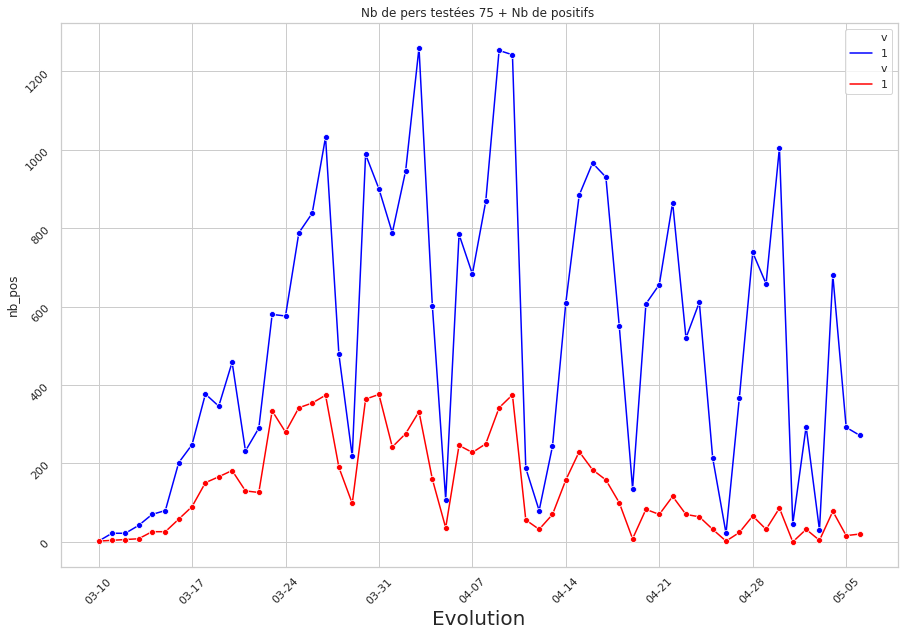

In [99]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Nb de pers testées 75 + Nb de positifs ', fontsize=12)
sns.set(style="whitegrid")
tsplot(dfi, 'jour', 'nb_test', "v", cc=["blue"])
tsplot(dfi, 'jour', 'nb_pos', "v", cc=["red"])

Données hopitaux

In [0]:
#France - Hopitaux - https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/#_
url='https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7'
df=pd.read_csv(url, sep=';')

In [101]:
pd.set_option('display.max_rows', None)
df.tail()

,dep,sexe,jour,hosp,rea,rad,dc
16057,974,1,2020-05-09,9,5,53,0
16058,974,2,2020-05-09,1,0,58,0
16059,976,0,2020-05-09,56,9,123,12
16060,976,1,2020-05-09,32,7,65,9
16061,976,2,2020-05-09,24,2,56,3


In [0]:
# Paris
#df=df[df['dep'].isin(['75',"92", "93", "94", "95", "78"])]
df=df[df['dep'].isin(['75'])]
df.jour = pd.to_datetime(df.jour)
df.dep=df.dep.astype(str)
df['v']="1"

In [103]:
dfi=df.groupby(["dep", "jour"])['hosp', 'rea'].sum().reset_index()
dfi['v']="1"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [0]:
dfi['diffhosp'] = dfi['hosp'].diff(1)

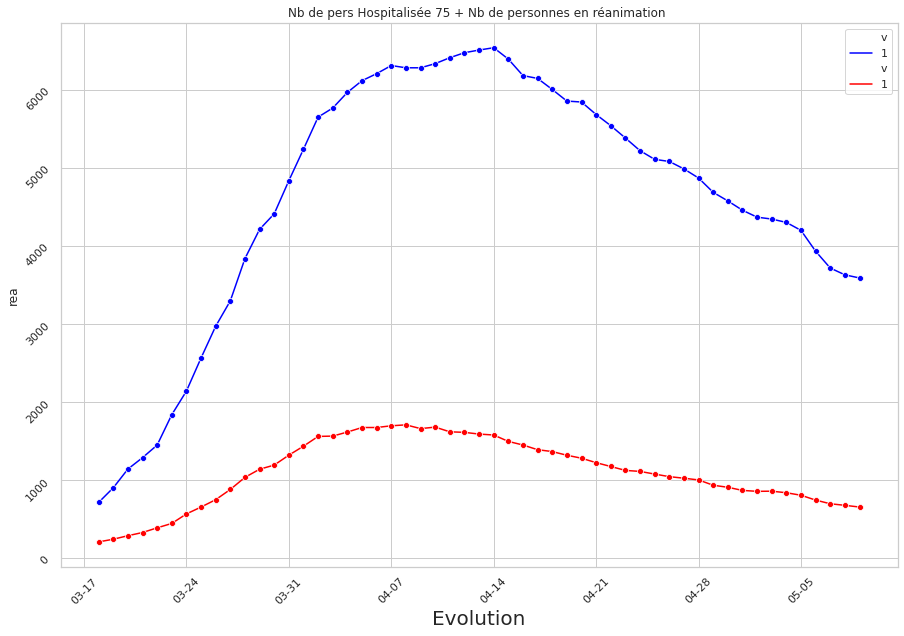

In [105]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(style="whitegrid")
plt.title('Nb de pers Hospitalisée 75 + Nb de personnes en réanimation ', fontsize=12)
tsplot(dfi, 'jour', 'hosp', "v", cc=["blue"])
tsplot(dfi, 'jour', 'rea', "v", cc=["red"])

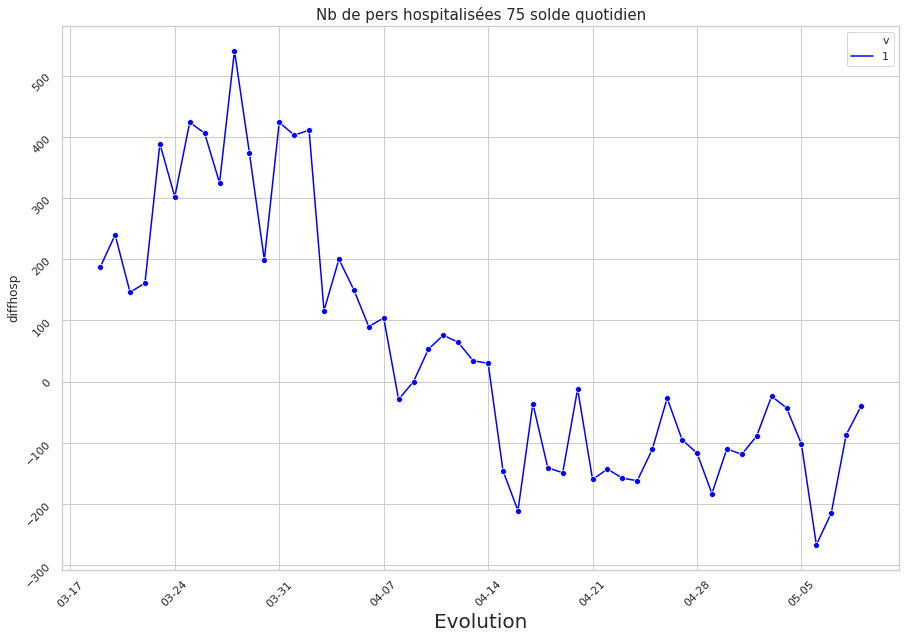

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Nb de pers hospitalisées 75 solde quotidien', fontsize=15)
sns.set(style="whitegrid")
tsplot(dfi, 'jour', 'diffhosp', "v", cc=["blue"])